# Kelompok 3:

*   Noel Christevent M.  - 10101200436 
*   Christopher K.S.     - 10101190155
*   Edgar Tigor          - 10101190203



# **Melihat perkembangan kasus positif harian (Jakarta) dan mencoba memprediksi kasis 2 minggu**

In [ ]:
import pandas as pd
DataBase = pd.read_excel('https://tiny.cc/Datacovidjakarta') #import data dari sheet pertama

In [ ]:
DataBase.head() #Data dimulai dari tanggal 1 Maret 2020

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
0,2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-03-02,0,0,2,2,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0
2,2020-03-03,0,0,2,2,1,0,0,2,3,2,0,0,0,0,1,0,0,2,3,2
3,2020-03-04,0,0,2,2,1,0,0,2,3,2,0,0,0,0,0,0,0,0,0,0
4,2020-03-05,0,0,2,2,3,0,0,4,7,4,0,0,0,0,2,0,0,2,4,2


In [ ]:
DataBase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Tanggal                          407 non-null    datetime64[ns]
 1   Meninggal (Indonesia)            407 non-null    int64         
 2   Sembuh (Indonesia)               407 non-null    int64         
 3   Dirawat (Indonesia)              407 non-null    int64         
 4   Positif (Indonesia)              407 non-null    int64         
 5   Meninggal (Jakarta)              407 non-null    int64         
 6   Sembuh (Jakarta)                 407 non-null    int64         
 7   Self-Isolation (Jakarta)         407 non-null    int64         
 8   Dirawat (Jakarta)                407 non-null    int64         
 9   Positif (Jakarta)                407 non-null    int64         
 10  Positif Aktif (Jakarta)          407 non-null    int64        

In [ ]:
DataBase[DataBase.Tanggal== '2021-01-01'] #cari index tanggal 1 Januari 2021

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
306,2021-01-01,22329,617936,111005,751270,3308,166512,10082,5789,185691,15871,191,6839,1042,8072,21,1631,336,-32,1956,304


In [ ]:
DataBase[DataBase.Tanggal== '2021-02-09'] #cari index tanggal 9 Februari 2021

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
345,2021-02-09,31976,973452,169351,1174779,4681,271573,18174,5978,300406,24152,213,10424,-1937,8700,50,2788,408,191,3437,599


In [ ]:
DataBase.tail(15)

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
392,2021-03-28,40449,1331400,124236,1496085,6304,365592,3966,3830,379692,7796,85,4279,-281,4083,23,1341,34,72,1470,106
393,2021-03-29,40581,1336818,123694,1501093,6324,366615,4034,3733,380706,7767,132,5418,-542,5008,20,1023,68,-97,1014,-29
394,2021-03-30,40754,1342695,122326,1505775,6327,367819,3419,3525,381090,6944,173,5877,-1368,4682,3,1204,-615,-208,384,-823
395,2021-03-31,40858,1348330,122524,1511712,6341,369007,3028,3679,382055,6707,104,5635,198,5937,14,1188,-391,154,965,-237
396,2021-04-01,41054,1355578,121222,1517854,6344,369929,3447,3672,383392,7119,196,7248,-1302,6142,3,922,419,-7,1337,412
397,2021-04-02,41151,1361017,121011,1523179,6351,371254,3433,3594,384632,7027,97,5439,-211,5325,7,1325,-14,-78,1240,-92
398,2021-04-03,41242,1366214,120068,1527524,6356,372494,3317,3563,385730,6880,91,5197,-943,4345,5,1240,-116,-31,1098,-147
399,2021-04-04,41669,1375877,116709,1534255,6360,373565,3149,3392,386466,6541,427,9663,-3359,6731,4,1071,-168,-171,736,-339
400,2021-04-05,41815,1381677,114475,1537967,6372,374542,2771,3304,386989,6075,146,5800,-2234,3712,12,977,-378,-88,523,-466
401,2021-04-06,41977,1385973,114566,1542516,6379,375080,2705,3312,387476,6017,162,4296,91,4549,7,538,-66,8,487,-58


In [ ]:
#Slice Data
df1 = DataBase.iloc[:,:] #Data mulai dari 1 Maret 2020 semenjak kasus pertama
df2 = DataBase.iloc[306:,:] #Data mulai dari 1 Januari 2021 semenjak awal tahun baru
df3 = DataBase.iloc[345:,:] #Data mulai dari 9 Februari 2021 semenjak diadakan PPKM jilid 2

In [ ]:
df1.head() #cek data pertama

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
0,2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-03-02,0,0,2,2,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0
2,2020-03-03,0,0,2,2,1,0,0,2,3,2,0,0,0,0,1,0,0,2,3,2
3,2020-03-04,0,0,2,2,1,0,0,2,3,2,0,0,0,0,0,0,0,0,0,0
4,2020-03-05,0,0,2,2,3,0,0,4,7,4,0,0,0,0,2,0,0,2,4,2


In [ ]:
df2.head() #cek data kedua

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
306,2021-01-01,22329,617936,111005,751270,3308,166512,10082,5789,185691,15871,191,6839,1042,8072,21,1631,336,-32,1956,304
307,2021-01-02,22555,625518,110400,758473,3334,168781,10872,4599,187586,15471,226,7582,-605,7203,26,2269,790,-1190,1895,-400
308,2021-01-03,22734,631937,110679,765350,3345,170510,10978,4410,189243,15388,179,6419,279,6877,11,1729,106,-189,1657,-83
309,2021-01-04,22911,639103,110089,772103,3369,173036,10371,4299,191075,14670,177,7166,-590,6753,24,2526,-607,-111,1832,-718
310,2021-01-05,23109,645746,110693,779548,3392,174131,10897,4479,192899,15376,198,6643,604,7445,23,1095,526,180,1824,706


In [ ]:
df3.head() #cek data ketiga

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
345,2021-02-09,31976,973452,169351,1174779,4681,271573,18174,5978,300406,24152,213,10424,-1937,8700,50,2788,408,191,3437,599
346,2021-02-10,32167,982972,168416,1183555,4725,274817,16676,7497,303715,24173,191,9520,-935,8776,44,3244,-1498,1519,3309,21
347,2021-02-11,32381,993117,166492,1191990,4748,278822,14119,8540,306229,22659,214,10145,-1924,8435,23,4005,-2557,1043,2514,-1514
348,2021-02-12,32656,1004117,165086,1201859,4798,284579,10774,9888,310039,20662,275,11000,-1406,9869,50,5757,-3345,1348,3810,-1997
349,2021-02-13,32936,1016036,161731,1210703,4850,289189,9644,9374,313057,19018,280,11919,-3355,8844,52,4610,-1130,-514,3018,-1644


## **Hanya abil kolom Tanggal  Positif Harian (Jakarta)**
### Harinya dihitung dari awal

In [ ]:
# reset index untuk menghitung ulang harinya (sebagai index)
# hanya ambil kolom Positif Harian (Jakarta)
# reset index lagi untuk membuat index tersebut jadi satu kolom bernama index
# rename kolom index menjadi Day

df1 = df1.reset_index().iloc[:,[1,20]].reset_index().rename(columns={'index':'Day'})
df2 = df2.reset_index().iloc[:,[1,20]].reset_index().rename(columns={'index':'Day'})
df3 = df3.reset_index().iloc[:,[1,20]].reset_index().rename(columns={'index':'Day'})

In [ ]:
df3.tail() #cek contoh df3

,Day,Tanggal,Positif Harian (Jakarta)
57,57,2021-04-07,862
58,58,2021-04-08,1239
59,59,2021-04-09,1013
60,60,2021-04-10,977
61,61,2021-04-11,1031


## **Bangun Model Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression as LR

# Bangun model biasa
modelLR1 = LR()
modelLR2 = LR()
modelLR3 = LR()

# Melatih Model
modelLR1.fit(df1.iloc[:393,0].values.reshape(-1,1),df1.iloc[:393,2].values.reshape(-1,1)) #latih menggunakan data mulai dari 1 Maret 2020 semenjak kasus pertama sampai tanggal 28 Maret 2021 saat instruksi uts diberikan
modelLR2.fit(df2.iloc[:393,0].values.reshape(-1,1),df2.iloc[:393,2].values.reshape(-1,1)) #latih menggunakan data mulai dari 1 Januari 2021 semenjak awal tahun baru sampai tanggal 28 Maret 2021 saat instruksi uts diberikan
modelLR3.fit(df3.iloc[:393,0].values.reshape(-1,1),df3.iloc[:393,2].values.reshape(-1,1)) #latih menggunakan data mulai dari 9 Februari 2021 semenjak diadakan PPKM jilid 2 sampai tanggal 28 Maret 2021 saat instruksi uts diberikan

# Mencari prediksi model
predLR1 = modelLR1.predict(df1.iloc[:393,0].values.reshape(-1,1))
predLR2 = modelLR2.predict(df2.iloc[:393,0].values.reshape(-1,1))
predLR3 = modelLR3.predict(df3.iloc[:393,0].values.reshape(-1,1))

# Mencari koefisen model
coefLR1 = round(float(modelLR1.coef_),3)
coefLR2 = round(float(modelLR2.coef_),3)
coefLR3 = round(float(modelLR3.coef_),3)

# Mencari konstanta model
interLR1 = round(float(modelLR1.intercept_),3)
interLR2 = round(float(modelLR2.intercept_),3)
interLR3 = round(float(modelLR3.intercept_),3)

In [ ]:
from sklearn.linear_model import LinearRegression as LR

# Bangun model yang dicentering
modelLR1C = LR(fit_intercept=False)
modelLR2C = LR(fit_intercept=False)
modelLR3C = LR(fit_intercept=False)

# Melatih Model
modelLR1C.fit(df1.iloc[:393	,0].values.reshape(-1,1),df1.iloc[:393,2].values.reshape(-1,1)) #latih menggunakan data mulai dari 1 Maret 2020 semenjak kasus pertama sampai tanggal 28 Maret 2021 saat instruksi uts diberikan
modelLR2C.fit(df2.iloc[:393	,0].values.reshape(-1,1),df2.iloc[:393,2].values.reshape(-1,1)) #latih menggunakan data mulai dari 1 Januari 2021 semenjak awal tahun baru sampai tanggal 28 Maret 2021 saat instruksi uts diberikan
modelLR3C.fit(df3.iloc[:393	,0].values.reshape(-1,1),df3.iloc[:393,2].values.reshape(-1,1)) #latih menggunakan data mulai dari 9 Februari 2021 semenjak diadakan PPKM jilid 2 sampai tanggal 28 Maret 2021 saat instruksi uts diberikan

# Mencari prediksi model
predLR1C = modelLR1C.predict(df1.iloc[:393,0].values.reshape(-1,1))
predLR2C = modelLR2C.predict(df2.iloc[:393,0].values.reshape(-1,1))
predLR3C = modelLR3C.predict(df3.iloc[:393,0].values.reshape(-1,1))

# Mencari koefisen model
coefLR1C = round(float(modelLR1C.coef_),3)
coefLR2C = round(float(modelLR2C.coef_),3)
coefLR3C = round(float(modelLR3C.coef_),3)

# Mencari konstanta model
interLR1C = modelLR1C.intercept_
interLR2C = modelLR2C.intercept_
interLR3C = modelLR3C.intercept_

## **Visualisasi LinearRegression**

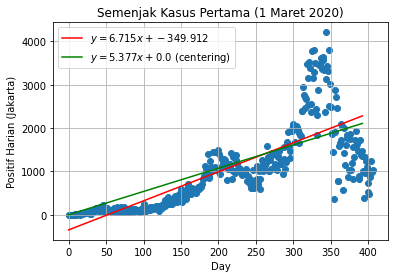

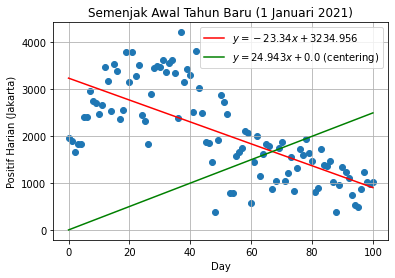

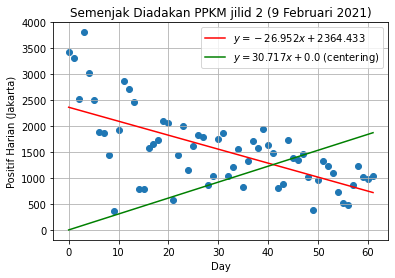

In [ ]:
import matplotlib.pyplot as plt

# Semenjak Kasus Pertama (1 Maret 2020)
plt.scatter(df1['Day'],df1['Positif Harian (Jakarta)']) #Plot data

plt.plot(df1.iloc[:393	,0],predLR1,c = 'r',label='$y=%sx+%s$' % (coefLR1,interLR1)) #Plot prediksi model LinearRegression1
plt.plot(df1.iloc[:393	,0],predLR1C,c = 'g',label='$y=%sx+%s$ (centering)' % (coefLR1C,interLR1C)) #Plot prediksi model LinearRegression1 yang Centering

plt.title('Semenjak Kasus Pertama (1 Maret 2020)')
plt.xlabel('Day')
plt.ylabel('Positif Harian (Jakarta)')
plt.legend()
plt.grid()
plt.show()


# Semenjak Awal Tahun Baru (1 Januari 2021)
plt.scatter(df2['Day'],df2['Positif Harian (Jakarta)']) #Plot data

plt.plot(df2.iloc[:393	,0],predLR2,c = 'r',label='$y=%sx+%s$' % (coefLR2,interLR2)) #Plot prediksi model LinearRegression2
plt.plot(df2.iloc[:393	,0],predLR2C,c = 'g',label='$y=%sx+%s$ (centering)' % (coefLR2C,interLR2C)) #Plot prediksi model LinearRegression2 yang Centering

plt.title('Semenjak Awal Tahun Baru (1 Januari 2021)')
plt.xlabel('Day')
plt.ylabel('Positif Harian (Jakarta)')
plt.legend()
plt.grid()
plt.show()


# Semenjak Diadakan PPKM jilid 2 (9 Februari 2021)
plt.scatter(df3['Day'],df3['Positif Harian (Jakarta)']) #Plot data

plt.plot(df3.iloc[:393	,0],predLR3,c = 'r',label='$y=%sx+%s$' % (coefLR3,interLR3)) #Plot prediksi model LinearRegression3
plt.plot(df3.iloc[:393	,0],predLR3C,c = 'g',label='$y=%sx+%s$ (centering)' % (coefLR3C,interLR3C)) #Plot prediksi model LinearRegression3 yang Centering

plt.title('Semenjak Diadakan PPKM jilid 2 (9 Februari 2021)')
plt.xlabel('Day')
plt.ylabel('Positif Harian (Jakarta)')
plt.legend()
plt.grid()
plt.show()

**Analisa 1.1:**

Model Regresi dari kelompok kami divisualisasikan dengan warna merah (non-centering) dan warna hijau (centering). Berdasarkan visualisasi model kami di atas, jika nilai m (gradien/kemiringan) pada regresi yang tidak menggunakan centering bernilai positif artinya kasus positif harian (Jakarta) sedang meningkat. Sebaliknya, jika nilai m pada regresi yang tidak menggunakan centering bernilai negatif artinya kasus positif harian (Jakarta) sedang menurun.

Sementara itu, jika model regresi dilakukan centering, nilai m tidak mungkin negatif sehingga model tidak dapat membedakan kasus positif harian (Jakarta) yang sedang naik atau turun.

## **Prediksi positif harian (Jakarta) 2 minggu depan**

In [ ]:
df3.tail() #lihat data asli tanggal 11 April 2021

,Day,Tanggal,Positif Harian (Jakarta)
57,57,2021-04-07,862
58,58,2021-04-08,1239
59,59,2021-04-09,1013
60,60,2021-04-10,977
61,61,2021-04-11,1031


In [ ]:
import numpy as np

# Instruksi UTS keluar tanggal 28 maret 2021, 2 minggu setelahnya adalah tanggal 11 April 2021

# Untuk model pertama tanggal 11 april 2021 adalah hari ke-405
print('Model pertama memprediksi 2 minggu depan kasus hariannya adalah',int(modelLR1.predict(np.array([405]).reshape(-1,1))))
print('Model pertama yang dicentering memprediksi 2 minggu depan kasus hariannya adalah',int(modelLR1C.predict(np.array([405]).reshape(-1,1))))

# Untuk model kedua tanggal 11 april 2021 adalah hari ke-100
print('Model kedua memprediksi 2 minggu depan kasus hariannya adalah',int(modelLR2.predict(np.array([405]).reshape(-1,1))))
print('Model kedua yang dicentering memprediksi 2 minggu depan kasus hariannya adalah',int(modelLR2C.predict(np.array([405]).reshape(-1,1))))

# Untuk model ketiga tanggal 11 april 2021 adalah hari ke-61
print('Model ketiga memprediksi 2 minggu depan kasus hariannya adalah',int(modelLR3.predict(np.array([405]).reshape(-1,1))))
print('Model ketiga yang dicentering memprediksi 2 minggu depan kasus hariannya adalah',int(modelLR3C.predict(np.array([405]).reshape(-1,1))))



Model pertama memprediksi 2 minggu depan kasus hariannya adalah 2369
Model pertama yang dicentering memprediksi 2 minggu depan kasus hariannya adalah 2177
Model kedua memprediksi 2 minggu depan kasus hariannya adalah -6217
Model kedua yang dicentering memprediksi 2 minggu depan kasus hariannya adalah 10101
Model ketiga memprediksi 2 minggu depan kasus hariannya adalah -8551
Model ketiga yang dicentering memprediksi 2 minggu depan kasus hariannya adalah 12440


**Analisa 1.2 :**

Data asli menunjukan kasus positif (Jakarta) pada tanggal 11 April 2021 sebanyak 1031 kasus. Model yang memiliki prediksi paling mendekati data asli adalah model pertama yang dicentering. Jumlah selisih prediksi model pertama yang dicentering sebanyak 1146 kasus.

# **Mangamati hubungan data Positif harian (Jakarta) dengan beberapa data lainnya**

Membuat **Scatter plot matrix dan korelasi terhadap Positif Harian (Jakarta)** dengan :


*   Data Tes Harian, Positive Harian, dan Positivity Harian untuk judul kolom Total DKI Jakarta dari *sheet* RDT Ag (Anti Gen)
*   Data Vaksinasi 1, Vaksinasi 2, Persentase 1, Persentase 2 untuk judul kolom Tenaga Kesehatan, Lanjut Usia, Pelayan Publik, dan Total untuk judul DKI dari *sheet* Vaksinasi




In [ ]:
DataBase[DataBase.Tanggal == '2021-03-05'] #cari tahu tanggal 5 Maret ada di indeks ke berapa

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
369,2021-03-05,37026,1182687,148380,1368093,5702,334100,4026,3147,346975,7173,129,6331,535,6995,45,1342,86,-314,1159,-228


In [ ]:
df4 = DataBase.iloc[369:] #Data dari 5 maret 2021
Positif_harian_Jakarta = df4['Positif Harian (Jakarta)'].values #Mengambil data Posistif harian jakarta dari data base

In [ ]:
import pandas as pd
xls = pd.ExcelFile('https://tiny.cc/Datacovidjakarta')
RDT_Ag = pd.read_excel(xls, 'RDT Ag') #mengambil sheet RDT Ag
Vaksinasi = pd.read_excel(xls, 'Vaksinasi') #mengambil sheet Vaksinasi

## **Data RDT Ag**

In [ ]:
RDT_Ag

,No.,EIS,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,NAR,Unnamed: 7,Unnamed: 8,Unnamed: 9,Excel,Unnamed: 11,Unnamed: 12,Unnamed: 13,Total DKI Jakarta,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,Tgl,Positif,Negatif,Total,Positivity Rate,Positif,Negatif,Total,Positivity Rate,Positif,Negatif,Total,Positivity Rate,Tes Harian,Positif Harian,Negatif Harian,Positivity Rate Harian,Total Kumulatif,Positif Kumulatif,Negatif Kumulatif,Positivity Rate Kumulatif
1,1.0,2021-01-01 00:00:00,76,1116,1192,0.0637584,0,0,0,#DIV/0!,0,0,0,#DIV/0!,1192,76,1116,0.0637584,1192,76,1116,0.0637584
2,2.0,2021-01-02 00:00:00,76,1116,1192,0.0637584,0,0,0,#DIV/0!,0,0,0,#DIV/0!,0,0,0,#DIV/0!,1192,76,1116,0.0637584
3,3.0,2021-01-03 00:00:00,100,1699,1799,0.0555864,0,0,0,#DIV/0!,0,0,0,#DIV/0!,607,24,583,0.0395387,1799,100,1699,0.0555864
4,4.0,2021-01-04 00:00:00,100,1699,1799,0.0555864,0,0,0,#DIV/0!,0,0,0,#DIV/0!,0,0,0,#DIV/0!,1799,100,1699,0.0555864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,97.0,2021-04-07 00:00:00,3387,49908,53295,0.0635519,2145,82939,85084,0.0252104,42,974,1016,0.0413386,3665,74,3591,0.020191,139395,5574,133821,0.0399871
98,98.0,2021-04-08 00:00:00,3410,50411,53821,0.0633582,2218,86646,88864,0.0249595,42,974,1016,0.0413386,4306,96,4210,0.0222945,143701,5670,138031,0.0394569
99,99.0,2021-04-09 00:00:00,3431,50905,54336,0.0631441,2301,90667,92968,0.0247505,42,974,1016,0.0413386,4619,104,4515,0.0225157,148320,5774,142546,0.0389293
100,100.0,2021-04-10 00:00:00,3451,51413,54864,0.062901,2346,94175,96521,0.0243056,42,974,1016,0.0413386,4081,65,4016,0.0159275,152401,5839,146562,0.0383134


In [ ]:
Tanggal = RDT_Ag.iloc[64:,1]
Tanggal = Tanggal.reset_index()
Tanggal = Tanggal.rename(columns={'EIS':'Date-Time'})
Tanggal #ambil kolom tanggal

,index,Date-Time
0,64,2021-03-05 00:00:00
1,65,2021-03-06 00:00:00
2,66,2021-03-07 00:00:00
3,67,2021-03-08 00:00:00
4,68,2021-03-09 00:00:00
5,69,2021-03-10 00:00:00
6,70,2021-03-11 00:00:00
7,71,2021-03-12 00:00:00
8,72,2021-03-13 00:00:00
9,73,2021-03-14 00:00:00


In [ ]:
RDT_Ag = RDT_Ag.iloc[64:,[14,15,17]]
RDT_Ag.rename(columns={'Total DKI Jakarta':'Data Tes Harian','Unnamed: 15':'Positive Harian','Unnamed: 17':'Positivity Rate Harian'},inplace=True)
RDT_Ag = RDT_Ag.astype(float)
RDT_Ag = RDT_Ag.reset_index().drop(['index'],axis=1)
RDT_Ag.head()

,Data Tes Harian,Positive Harian,Positivity Rate Harian
0,1297.0,49.0,0.037779
1,1425.0,60.0,0.042105
2,1371.0,97.0,0.070751
3,737.0,33.0,0.044776
4,502.0,18.0,0.035857


## **Data Vaksinasi**

In [ ]:
Vaksinasi = Vaksinasi.iloc[:-1,:]
Vaksinasi

,Sasaran Total Indonesia: 181.554.465,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,Sasaran Total DKI Jakarta: 8.815.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tanggal,DKI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Tenaga Kesehatan,NaN,NaN,NaN,NaN,Lansia,NaN,NaN,NaN,NaN,Pelayan Publik,NaN,NaN,NaN,NaN,Total,NaN,NaN,NaN,NaN,Tenaga Kesehatan,NaN,NaN,NaN,NaN,Lansia,NaN,NaN,NaN,NaN,Pelayan Publik,NaN,NaN,NaN,NaN,Total,NaN,NaN,NaN,NaN
3,NaN,Target Vaksinasi,Vaksinasi 1,Vaksinasi 2,Persentase 1,Persentase 2,Target Vaksinasi,Vaksinasi 1,Vaksinasi 2,Persentase 1,Persentase 2,Target Vaksinasi,Vaksinasi 1,Vaksinasi 2,Persentase 1,Persentase 2,Target Vaksinasi,Vaksinasi 1,Vaksinasi 2,Persentase 1,Persentase 2,Target Vaksinasi,Vaksinasi 1,Vaksinasi 2,Persentase 1,Persentase 2,Target Vaksinasi,Vaksinasi 1,Vaksinasi 2,Persentase 1,Persentase 2,Target Vaksinasi,Vaksinasi 1,Vaksinasi 2,Persentase 1,Persentase 2,Target Vaksinasi,Vaksinasi 1,Vaksinasi 2,Persentase 1,Persentase 2
4,5 Maret 2021,112301,141425,91078,1.25934,0.811017,911631,76451,0,0.0838618,0,1976757,64121,0,0.0324375,0,3000689,281997,91078,0.0939774,0.0303524,1468764,1692016,1111938,1.152,0.757057,21553118,179711,2,0.00833805,9.2794e-08,17327169,541888,2597,0.0312739,0.00014988,40349051,2413615,1114537,0.0598184,0.0276224
5,6 Maret 2021,112301,144046,91379,1.28268,0.813697,911631,79421,0,0.0871197,0,1976757,66484,0,0.0336329,0,3000689,289951,91379,0.0966281,0.0304527,1468764,1741784,1126353,1.18588,0.766871,21553118,206025,2,0.00955894,9.2794e-08,17327169,604456,4169,0.0348849,0.000240605,40349051,2552265,1130524,0.0632546,0.0280186
6,7 Maret 2021,112301,177126,91460,1.57724,0.814418,911631,83628,0,0.0917345,0,1976757,73752,2514,0.0373096,0.00127178,3000689,334506,93974,0.111476,0.0313175,1468764,2049651,1129340,1.39549,0.768905,21553118,215632,2,0.0100047,9.2794e-08,17327169,623474,4445,0.0359825,0.000256534,40349051,2888757,1133787,0.0715942,0.0280995
7,8 Maret 2021,112301,181237,92988,1.61385,0.828025,911631,95140,1,0.104362,1.09694e-06,1976757,85333,3989,0.0431682,0.00201795,3000689,361710,96978,0.120542,0.0323186,1468764,2114655,1149547,1.43975,0.782663,21553118,267603,5,0.012416,2.31985e-07,17327169,715767,8880,0.0413089,0.00051249,40349051,3098025,1158432,0.0767806,0.0287103
8,9 Maret 2021,112301,113326,89984,1.00913,0.801275,911631,135128,675,0.148227,0.000740431,1976757,174685,29195,0.0883695,0.0147691,3000689,423139,119854,0.141014,0.0399422,1468764,1395498,1127633,0.950117,0.767743,21553118,430591,1612,0.0199781,7.4792e-05,17327169,1510937,68527,0.0872005,0.00395489,40349051,3337026,1197772,0.082704,0.0296853
9,10 Maret 2021,112301,116791,90681,1.03998,0.807482,911631,154251,1100,0.169203,0.00120663,1976757,202452,17773,0.102416,0.00899099,3000689,473494,109554,0.157795,0.0365096,1468764,1395498,1127633,0.950117,0.767743,21553118,494125,2694,0.0229259,0.000124994,17327169,1682896,119495,0.0971247,0.00689639,40349051,3572519,1249822,0.0885403,0.0309753


### **Tenaga Kesehatan**

In [ ]:
Tenaga_Kesehatan = Vaksinasi.iloc[4:,2:6]
Tenaga_Kesehatan = Tenaga_Kesehatan.reset_index().drop(['index'],axis=1)
Tenaga_Kesehatan.rename(columns={'Unnamed: 2':'Vaksinasi 1 (TK)','Unnamed: 3':'Vaksinasi 2 (TK)','Unnamed: 4':'Persentase 1 (TK)','Unnamed: 5':'Persentase 2 (TK)'},inplace=True)
Tenaga_Kesehatan = Tenaga_Kesehatan.astype(float)
Tenaga_Kesehatan.head()

,Vaksinasi 1 (TK),Vaksinasi 2 (TK),Persentase 1 (TK),Persentase 2 (TK)
0,141425.0,91078.0,1.259339,0.811017
1,144046.0,91379.0,1.282678,0.813697
2,177126.0,91460.0,1.577243,0.814418
3,181237.0,92988.0,1.613850,0.828025
4,113326.0,89984.0,1.009127,0.801275


### **Lansia**

In [ ]:
Lansia = Vaksinasi.iloc[4:,7:11]
Lansia = Lansia.reset_index().drop(['index'],axis=1)
Lansia.rename(columns={'Unnamed: 7':'Vaksinasi 1 (Lansia)','Unnamed: 8':'Vaksinasi 2 (Lansia)','Unnamed: 9':'Persentase 1 (Lansia)','Unnamed: 10':'Persentase 2 (Lansia)'},inplace=True)
Lansia = Lansia.astype(float)
Lansia.head()

,Vaksinasi 1 (Lansia),Vaksinasi 2 (Lansia),Persentase 1 (Lansia),Persentase 2 (Lansia)
0,76451.0,0.0,0.083862,0.000000
1,79421.0,0.0,0.087120,0.000000
2,83628.0,0.0,0.091734,0.000000
3,95140.0,1.0,0.104362,0.000001
4,135128.0,675.0,0.148227,0.000740


### **Pelayanan Publik**

In [ ]:
Pelayan_Publik = Vaksinasi.iloc[4:,12:16]
Pelayan_Publik = Pelayan_Publik.reset_index().drop(['index'],axis=1)
Pelayan_Publik.rename(columns={'Unnamed: 12':'Vaksinasi 1 (PP)','Unnamed: 13':'Vaksinasi 2 (PP)','Unnamed: 14':'Persentase 1 (PP)','Unnamed: 15':'Persentase 2 (PP)'},inplace=True)
Pelayan_Publik = Pelayan_Publik.astype(float)
Pelayan_Publik.head()

,Vaksinasi 1 (PP),Vaksinasi 2 (PP),Persentase 1 (PP),Persentase 2 (PP)
0,64121.0,0.0,0.032437,0.000000
1,66484.0,0.0,0.033633,0.000000
2,73752.0,2514.0,0.037310,0.001272
3,85333.0,3989.0,0.043168,0.002018
4,174685.0,29195.0,0.088369,0.014769


### **Total**

In [ ]:
Total = Vaksinasi.iloc[4:,17:21]
Total = Total.reset_index().drop(['index'],axis=1)
Total.rename(columns={'Unnamed: 17':'Vaksinasi 1 (Total)','Unnamed: 18':'Vaksinasi 2 (Total)','Unnamed: 19':'Persentase 1 (Total)','Unnamed: 20':'Persentase 2 (Total)'},inplace=True)
Total = Total.astype(float)
Total.head()

,Vaksinasi 1 (Total),Vaksinasi 2 (Total),Persentase 1 (Total),Persentase 2 (Total)
0,281997.0,91078.0,0.093977,0.030352
1,289951.0,91379.0,0.096628,0.030453
2,334506.0,93974.0,0.111476,0.031317
3,361710.0,96978.0,0.120542,0.032319
4,423139.0,119854.0,0.141014,0.039942


## Penggabungan fitur

In [ ]:
# Melakukan penggabungan data RDT_Ag, data vaksinasi dan Positif harian(Jakarta) untuk dicari korelasi matriks secara keseluruhan
Gabung = pd.concat([Tanggal,RDT_Ag,Tenaga_Kesehatan,Lansia,Pelayan_Publik,Total], axis=1)
Gabung['Positif harian Jakarta'] = Positif_harian_Jakarta
Gabung.drop(['index'],axis=1,inplace=True)
Gabung

,Date-Time,Data Tes Harian,Positive Harian,Positivity Rate Harian,Vaksinasi 1 (TK),Vaksinasi 2 (TK),Persentase 1 (TK),Persentase 2 (TK),Vaksinasi 1 (Lansia),Vaksinasi 2 (Lansia),Persentase 1 (Lansia),Persentase 2 (Lansia),Vaksinasi 1 (PP),Vaksinasi 2 (PP),Persentase 1 (PP),Persentase 2 (PP),Vaksinasi 1 (Total),Vaksinasi 2 (Total),Persentase 1 (Total),Persentase 2 (Total),Positif harian Jakarta
0,2021-03-05 00:00:00,1297.0,49.0,0.037779,141425.0,91078.0,1.259339,0.811017,76451.0,0.0,0.083862,0.000000,64121.0,0.0,0.032437,0.000000,281997.0,91078.0,0.093977,0.030352,1159
1,2021-03-06 00:00:00,1425.0,60.0,0.042105,144046.0,91379.0,1.282678,0.813697,79421.0,0.0,0.087120,0.000000,66484.0,0.0,0.033633,0.000000,289951.0,91379.0,0.096628,0.030453,1616
2,2021-03-07 00:00:00,1371.0,97.0,0.070751,177126.0,91460.0,1.577243,0.814418,83628.0,0.0,0.091734,0.000000,73752.0,2514.0,0.037310,0.001272,334506.0,93974.0,0.111476,0.031317,1834
3,2021-03-08 00:00:00,737.0,33.0,0.044776,181237.0,92988.0,1.613850,0.828025,95140.0,1.0,0.104362,0.000001,85333.0,3989.0,0.043168,0.002018,361710.0,96978.0,0.120542,0.032319,1783
4,2021-03-09 00:00:00,502.0,18.0,0.035857,113326.0,89984.0,1.009127,0.801275,135128.0,675.0,0.148227,0.000740,174685.0,29195.0,0.088369,0.014769,423139.0,119854.0,0.141014,0.039942,867
5,2021-03-10 00:00:00,8160.0,262.0,0.032108,116791.0,90681.0,1.039982,0.807482,154251.0,1100.0,0.169203,0.001207,202452.0,17773.0,0.102416,0.008991,473494.0,109554.0,0.157795,0.036510,1040
6,2021-03-11 00:00:00,2526.0,111.0,0.043943,116823.0,90693.0,1.040267,0.807589,154915.0,1103.0,0.169932,0.001210,211754.0,17903.0,0.107122,0.009057,483492.0,109699.0,0.161127,0.036558,1754
7,2021-03-12 00:00:00,2119.0,117.0,0.055215,118086.0,91521.0,1.051513,0.814962,167086.0,1291.0,0.183282,0.001416,234403.0,20226.0,0.118580,0.010232,519575.0,113038.0,0.173152,0.037671,1873
8,2021-03-13 00:00:00,1647.0,55.0,0.033394,118283.0,91748.0,1.053268,0.816983,174327.0,1444.0,0.191225,0.001584,245355.0,21272.0,0.124120,0.010761,537965.0,114464.0,0.179280,0.038146,1034
9,2021-03-14 00:00:00,2617.0,107.0,0.040887,118301.0,91764.0,1.053428,0.817125,179024.0,1444.0,0.196378,0.001584,252763.0,21413.0,0.127868,0.010832,550088.0,114621.0,0.183321,0.038198,1204


In [ ]:
Gabung.shape

(38, 21)

### Mencari korelasinya

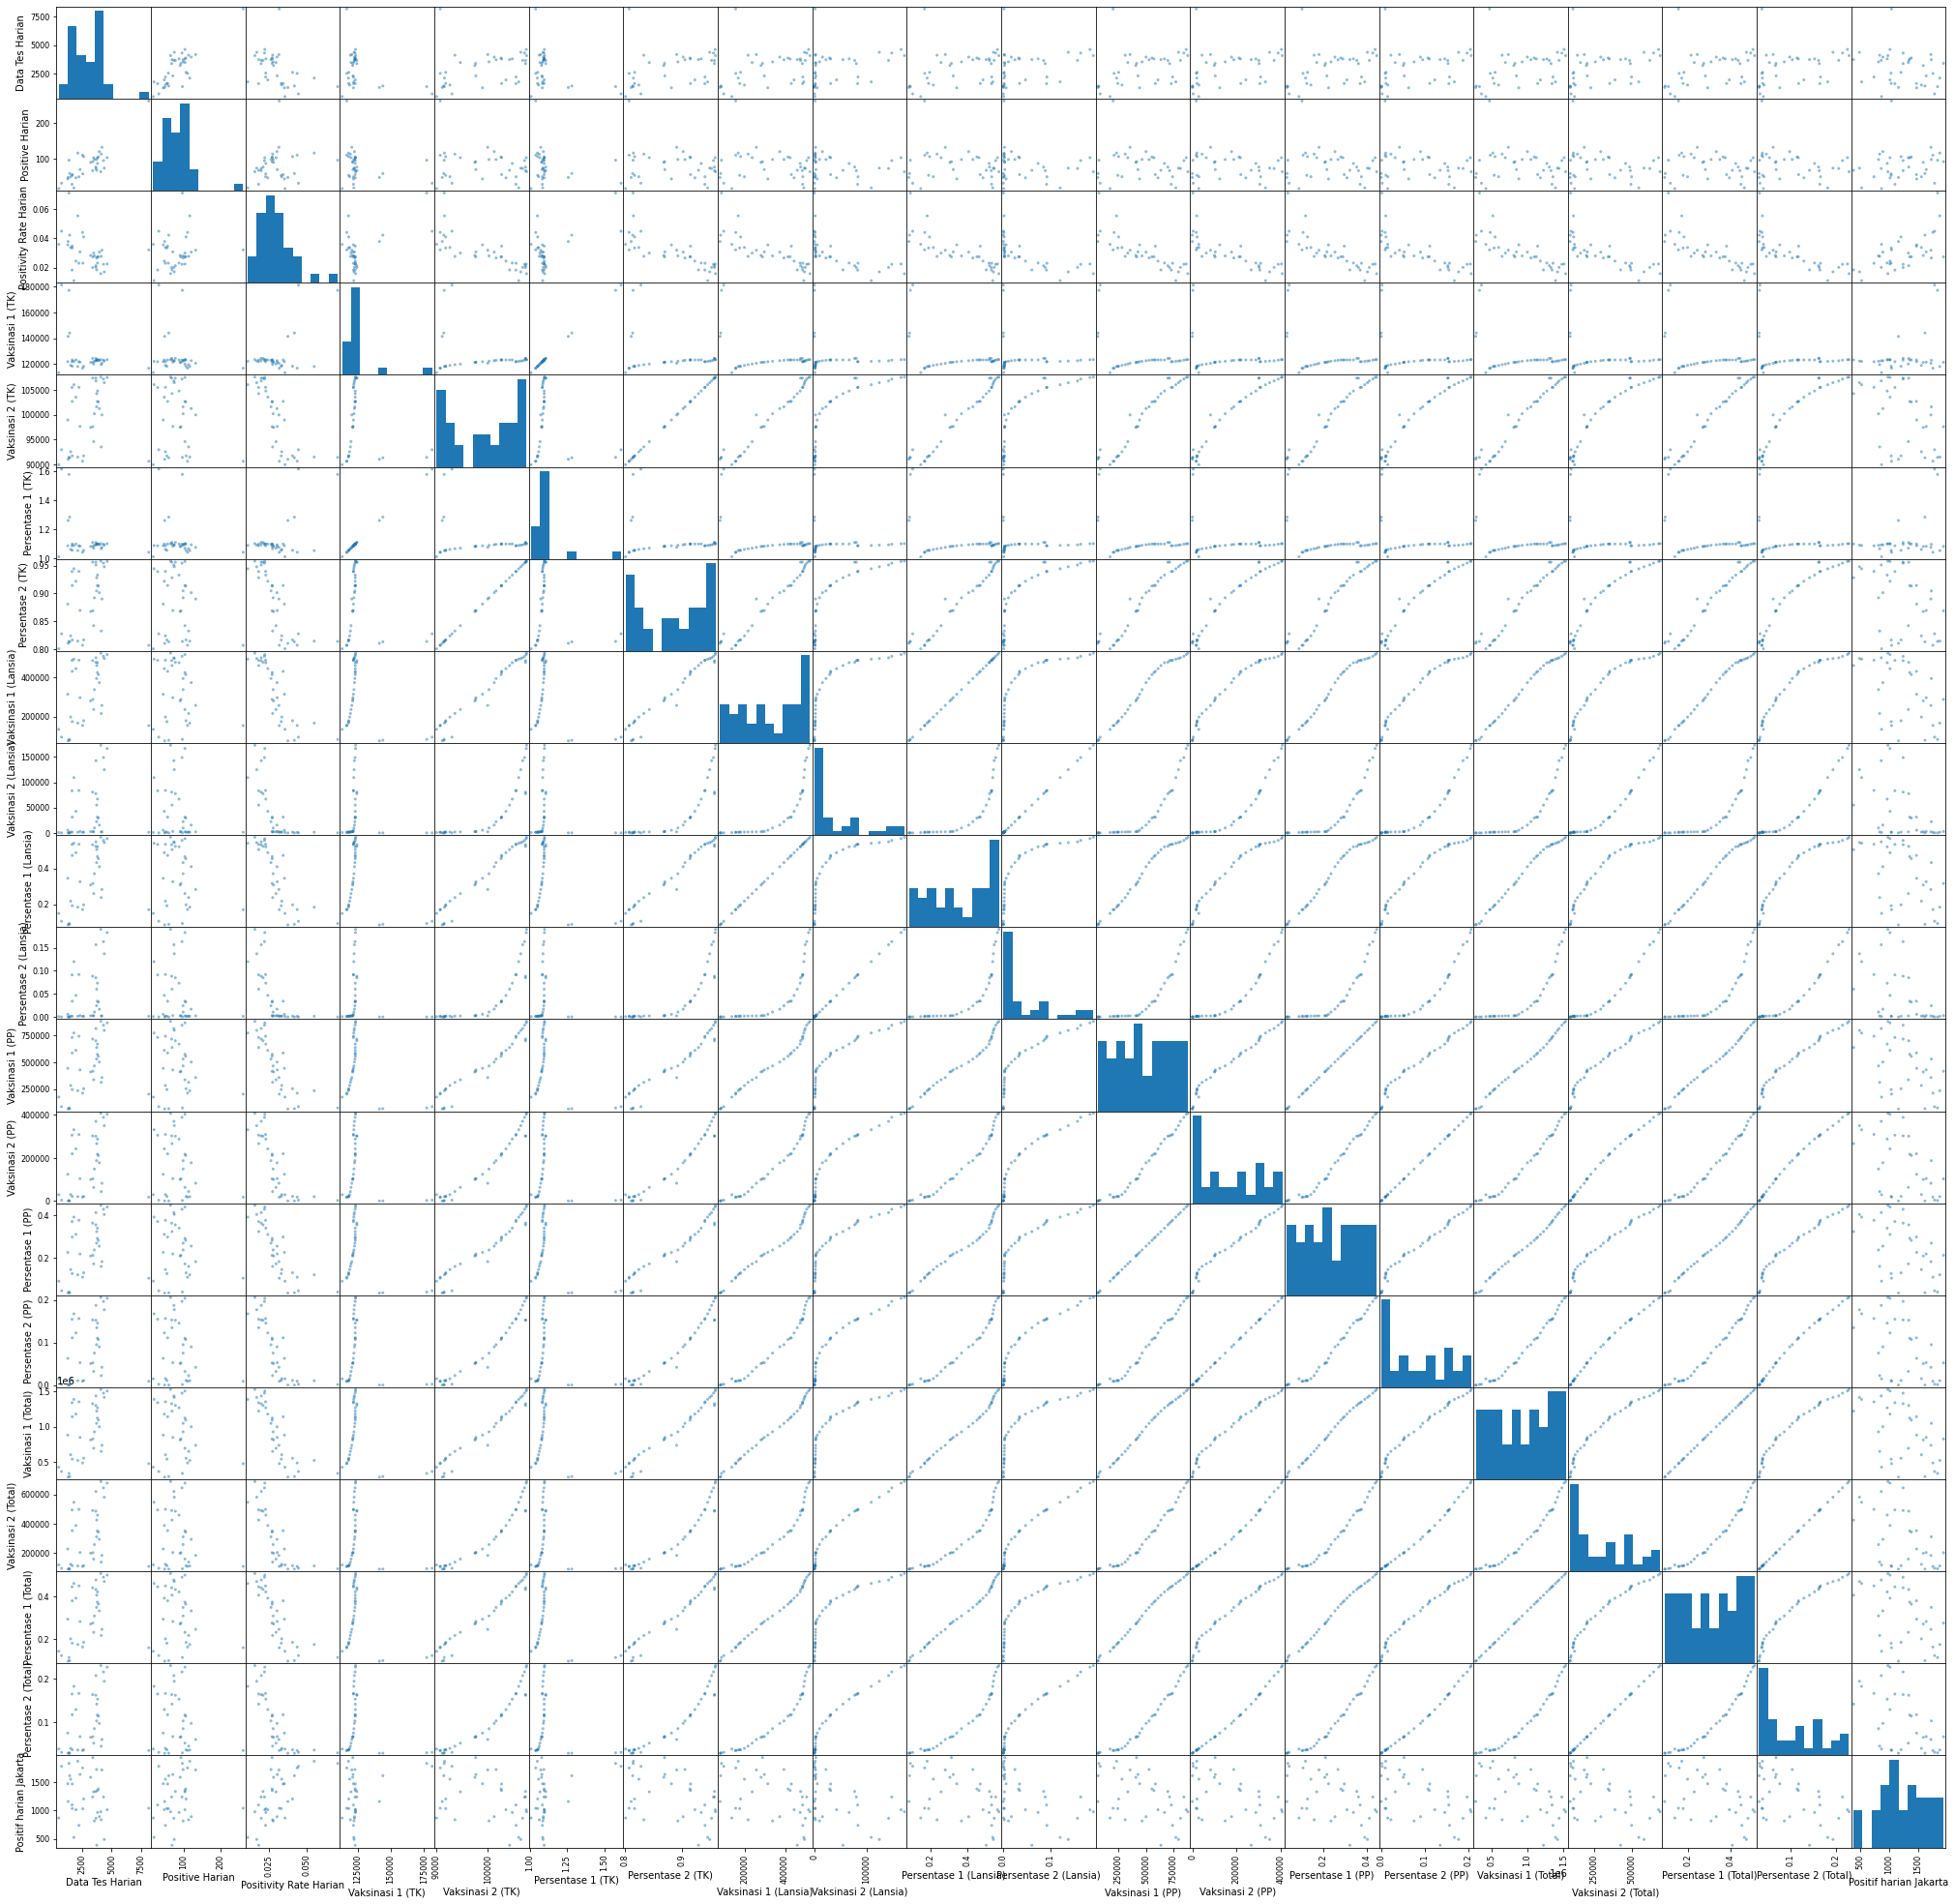

In [ ]:
#Menampilkan matriks korelasi
from pandas.plotting import scatter_matrix
scatter_matrix(Gabung, figsize=(35,35))
plt.show()

In [ ]:
# Korelasi
print('Korelasi terhadap Posistif harian Jakarta:')
corr_matrix = Gabung.corr()
corr_matrix['Positif harian Jakarta'].sort_values(ascending=False)

Korelasi terhadap Posistif harian Jakarta:


Positif harian Jakarta    1.000000
Positivity Rate Harian    0.632692
Persentase 1 (TK)         0.327881
Vaksinasi 1 (TK)          0.327881
Positive Harian           0.145230
Data Tes Harian          -0.236262
Persentase 2 (TK)        -0.433778
Vaksinasi 2 (TK)         -0.433778
Persentase 1 (Lansia)    -0.489690
Vaksinasi 1 (Lansia)     -0.489690
Vaksinasi 1 (Total)      -0.493763
Persentase 1 (Total)     -0.493763
Persentase 1 (PP)        -0.502233
Vaksinasi 1 (PP)         -0.502233
Vaksinasi 2 (Lansia)     -0.504161
Persentase 2 (Lansia)    -0.504161
Vaksinasi 2 (PP)         -0.518795
Persentase 2 (PP)        -0.518795
Vaksinasi 2 (Total)      -0.521117
Persentase 2 (Total)     -0.521117
Name: Positif harian Jakarta, dtype: float64

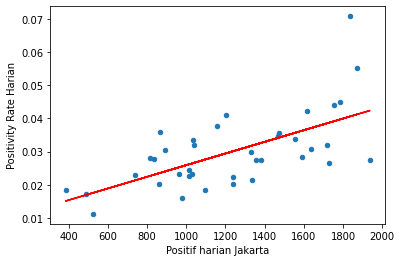

In [ ]:
Gabung.plot(kind='scatter', x='Positif harian Jakarta', y='Positivity Rate Harian')
x = Gabung['Positif harian Jakarta'].values.reshape(-1,1)
y = Gabung['Positivity Rate Harian'].values.reshape(-1,1)
line = LR().fit(x,y)
plt.plot(x,line.predict(x),c = 'r') 

**Analisis 2 :**

Dari uji korelasi di atas kita mendapatkan bahwa variabel yang cukup berpengaruh dalam menekan laju positif harian Jakarta adalah variabel positivity rate harian dengan besar korelasi 0.632692. Pada sebagian besar data, Positifity Rate Harian berbanding lurus dengan Positif harian Jakarta 

# **Membuat model regresi**

Melalui data-data di atas, kami membuat model regresi:

1.   Decision Tree Regressor
2.   Gradient Boost
3.   Random Forest Regressor



In [ ]:
# Membagi data menjadi data latih dan data uji
X = Gabung.iloc[:32,1:20].values # data latih
y = Gabung.iloc[:32,20].values # data latih
X_test = Gabung.iloc[32:-1,1:20].values # data uji
y_test = Gabung.iloc[32:-1,20].values # data uji

In [ ]:
tggl = Gabung.iloc[32:-1,0].values

### **Model Decission Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor as DTR

tree_reg = DTR(min_samples_leaf=4, random_state=0) #membuat model
tree_reg.fit(X, y) #melatih model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
# Mencari akurasi untuk Decission Tree Regressor
tree_reg.score(X_test, y_test)

0.3881294774373948

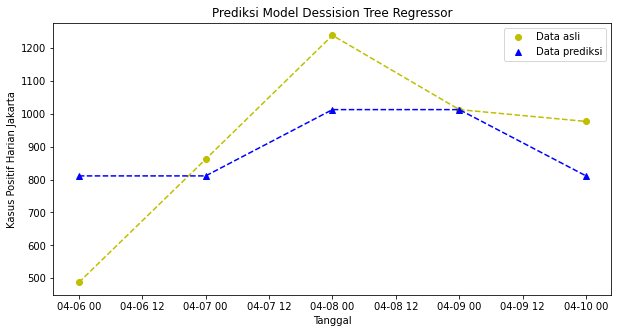

In [ ]:
pred_tree_reg = tree_reg.predict(X_test)

plt.figure(figsize=(10,5))
plt.plot(tggl,y_test,"y--")
plt.plot(tggl,y_test,"yo",label='Data asli')
plt.plot(tggl,pred_tree_reg,"b--")
plt.plot(tggl,pred_tree_reg,"b^",label='Data prediksi')
plt.legend()
plt.title('Prediksi Model Dessision Tree Regressor')
plt.xlabel('Tanggal')
plt.ylabel('Kasus Positif Harian Jakarta')
plt.show()

### **Model GradienBoost**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
gb_reg = GBR(n_estimators=3, max_depth=3, learning_rate=1, min_samples_split=5) #membuat model
gb_reg.fit(X,y) #melatih model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Mencari akurasi untuk Gradient Boost
gb_reg.score(X_test,y_test)

-2.174775985325744

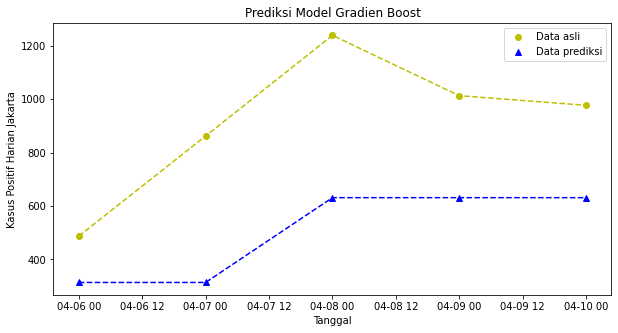

In [ ]:
pred_gb_reg = gb_reg.predict(X_test)

plt.figure(figsize=(10,5))
plt.plot(tggl,y_test,"y--")
plt.plot(tggl,y_test,"yo",label='Data asli')
plt.plot(tggl,pred_gb_reg,"b--")
plt.plot(tggl,pred_gb_reg,"b^",label='Data prediksi')
plt.legend()
plt.title('Prediksi Model Gradien Boost')
plt.xlabel('Tanggal')
plt.ylabel('Kasus Positif Harian Jakarta')
plt.show()

### **Model Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor as RFR

rf_reg = RFR(n_estimators = 4, random_state=0)
rf_reg.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=4, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
# Mencari akurasi untuk Random Forest Regressor
rf_reg.score(X_test,y_test)

0.4358605450713368

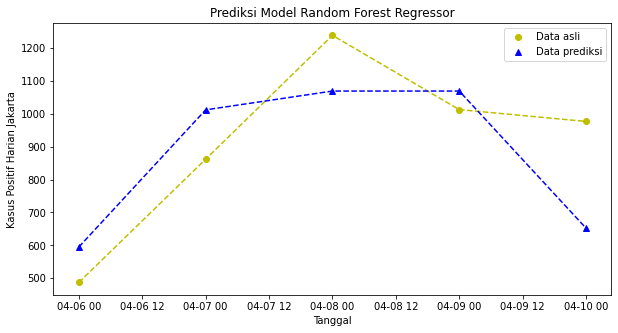

In [ ]:
pred_rf_reg = rf_reg.predict(X_test)

plt.figure(figsize=(10,5))
plt.plot(tggl,y_test,"y--")
plt.plot(tggl,y_test,"yo",label='Data asli')
plt.plot(tggl,pred_rf_reg,"b--")
plt.plot(tggl,pred_rf_reg,"b^",label='Data prediksi')
plt.legend()
plt.title('Prediksi Model Random Forest Regressor')
plt.xlabel('Tanggal')
plt.ylabel('Kasus Positif Harian Jakarta')
plt.show()

**Analisa 3 :**

Menurut kelompok kami, diantara model-model di atas model yang paling baik adalah model random forest regressor dengan akurasi sebesar 0.43586054. Hasil visualisasi dari data prediksi model random forest mendekati data asli. Akurasi model random forest regressor memiliki nilai yang lebih besar namun tidak jauh berbeda dengan model decession tree dikarenakan model random forest adalah ensemble learning dari beberapa decession tree.

# **Membuat PCA**
Data latih yang dipakai memiliki banyak fiture, coba reduksi fiturnya dengan PCA

In [ ]:
X = Gabung.iloc[:32,1:20].values # data latih
y = Gabung.iloc[:32,20].values # data latih
X_test = Gabung.iloc[32:-1,1:20].values # data uji
y_test = Gabung.iloc[32:-1,20].values # data uji

In [ ]:
from sklearn.decomposition import PCA
X = PCA(n_components=2).fit_transform(X) # melakukan reduksi data latih (X)
X_test = PCA(n_components=2).fit_transform(X_test) # melakukan reduksi data uji (X_test)

In [ ]:
X

array([[-727959.03485755,   77618.65295915],
       [-720031.24358835,   75415.66597754],
       [-681407.05240177,   72000.37685944],
       [-651281.05018974,   64447.53203628],
       [-539362.98146365,   34372.55470742],
       [-489520.40060753,     916.02688545],
       [-477599.26995083,   -3678.06261408],
       [-435313.38163047,  -16168.55626285],
       [-413832.68468136,  -22882.54626854],
       [-399984.4912414 ,  -28213.26378384],
       [-338945.36609233,  -39998.79970432],
       [-276328.06440441,  -44840.07836774],
       [-215697.74488123,  -41494.67156793],
       [-156809.74896301,  -33794.31505184],
       [ -60838.20510284,  -50673.15837849],
       [ -43330.76173042,  -52380.70084442],
       [ -18080.46363526,  -61053.03681333],
       [  30499.17530369,  -48678.89620551],
       [  97197.63079283,  -35407.41960937],
       [ 196106.45684137,  -27471.21026942],
       [ 259037.68041367,  -30480.48476976],
       [ 326999.85856006,  -15392.47935567],
       [ 3

### **Model  Dessision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg_red = DecisionTreeRegressor(max_depth=7, random_state=0)
tree_reg_red.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
# Mencari akurasi untuk Decission Tree Regressor (setelah fitur direduksi)
tree_reg_red.score(X_test,y_test)

-0.748353205806827

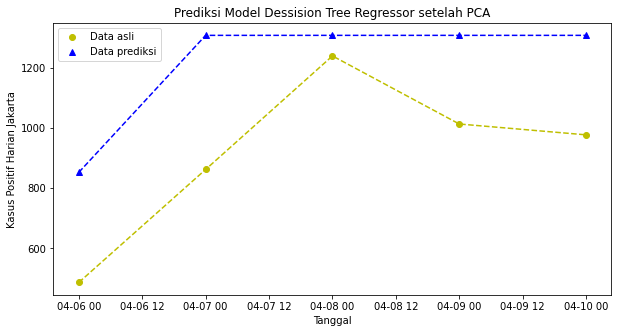

In [ ]:
pred_tree_reg_red = tree_reg_red.predict(X_test)

plt.figure(figsize=(10,5))
plt.plot(tggl,y_test,"y--")
plt.plot(tggl,y_test,"yo",label='Data asli')
plt.plot(tggl,pred_tree_reg_red,"b--")
plt.plot(tggl,pred_tree_reg_red,"b^",label='Data prediksi')
plt.legend()
plt.title('Prediksi Model Dessision Tree Regressor setelah PCA')
plt.xlabel('Tanggal')
plt.ylabel('Kasus Positif Harian Jakarta')
plt.show()

### **Model Gradient Boost**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
gb_reg_red = GBR(n_estimators=5, max_depth=7, learning_rate=2, min_samples_split=5,random_state=0) #membuat model
gb_reg_red.fit(X,y) #melatih model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=2, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=5,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Mencari akurasi untuk Gradient Boost (setelah fitur direduksi)
gb_reg_red.score(X_test,y_test)

0.2424266540648886

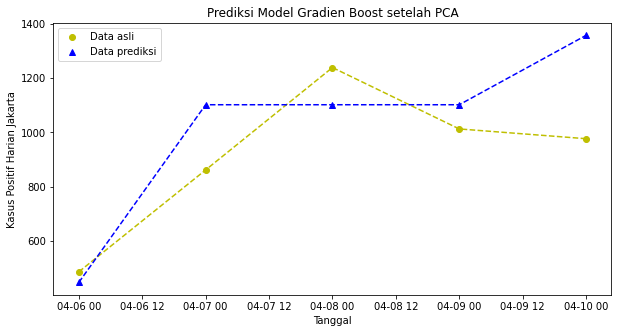

In [ ]:
pred_gb_reg_red = gb_reg_red.predict(X_test)

plt.figure(figsize=(10,5))
plt.plot(tggl,y_test,"y--")
plt.plot(tggl,y_test,"yo",label='Data asli')
plt.plot(tggl,pred_gb_reg_red,"b--")
plt.plot(tggl,pred_gb_reg_red,"b^",label='Data prediksi')
plt.legend()
plt.title('Prediksi Model Gradien Boost setelah PCA')
plt.xlabel('Tanggal')
plt.ylabel('Kasus Positif Harian Jakarta')
plt.show()

### **Model Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor as RFR

rf_reg_red = RFR(n_estimators = 11,max_depth=7, random_state=0)
rf_reg_red.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=11, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
# Mencari akurasi untuk Random Forest Regressor (setelah fitur direduksi)
rf_reg_red.score(X_test,y_test)

-1.5299371080806803

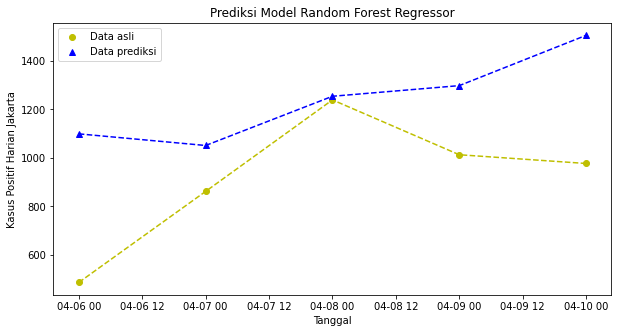

In [ ]:
pred_rf_reg_red = rf_reg_red.predict(X_test)

plt.figure(figsize=(10,5))
plt.plot(tggl,y_test,"y--")
plt.plot(tggl,y_test,"yo",label='Data asli')
plt.plot(tggl,pred_rf_reg_red,"b--")
plt.plot(tggl,pred_rf_reg_red,"b^",label='Data prediksi')
plt.legend()
plt.title('Prediksi Model Random Forest Regressor')
plt.xlabel('Tanggal')
plt.ylabel('Kasus Positif Harian Jakarta')
plt.show()

**Analisa 4:**

Setelah mereduksi fitur dari data gabungan, ternyata model gradient boost adalah yang paling baik. Error pada setiap tahapan decission tree dalam gradient boost akan berkurang karena fiturnya sudah berkurang sehingga predeksi gradient boost dapat lebih baik setelah fiturnya direduksi.

# **Melakukan klasifikasi berdasarkan Positivity rate**
Positifity rate memiliki koresasi tertinggi dengan data positif harian Jakarta karena itu kita coba klasfikasi berdasarkan Positivity rate

In [ ]:
Gabung

,Date-Time,Data Tes Harian,Positive Harian,Positivity Rate Harian,Vaksinasi 1 (TK),Vaksinasi 2 (TK),Persentase 1 (TK),Persentase 2 (TK),Vaksinasi 1 (Lansia),Vaksinasi 2 (Lansia),Persentase 1 (Lansia),Persentase 2 (Lansia),Vaksinasi 1 (PP),Vaksinasi 2 (PP),Persentase 1 (PP),Persentase 2 (PP),Vaksinasi 1 (Total),Vaksinasi 2 (Total),Persentase 1 (Total),Persentase 2 (Total),Positif harian Jakarta
0,2021-03-05 00:00:00,1297.0,49.0,0.037779,141425.0,91078.0,1.259339,0.811017,76451.0,0.0,0.083862,0.000000,64121.0,0.0,0.032437,0.000000,281997.0,91078.0,0.093977,0.030352,1159
1,2021-03-06 00:00:00,1425.0,60.0,0.042105,144046.0,91379.0,1.282678,0.813697,79421.0,0.0,0.087120,0.000000,66484.0,0.0,0.033633,0.000000,289951.0,91379.0,0.096628,0.030453,1616
2,2021-03-07 00:00:00,1371.0,97.0,0.070751,177126.0,91460.0,1.577243,0.814418,83628.0,0.0,0.091734,0.000000,73752.0,2514.0,0.037310,0.001272,334506.0,93974.0,0.111476,0.031317,1834
3,2021-03-08 00:00:00,737.0,33.0,0.044776,181237.0,92988.0,1.613850,0.828025,95140.0,1.0,0.104362,0.000001,85333.0,3989.0,0.043168,0.002018,361710.0,96978.0,0.120542,0.032319,1783
4,2021-03-09 00:00:00,502.0,18.0,0.035857,113326.0,89984.0,1.009127,0.801275,135128.0,675.0,0.148227,0.000740,174685.0,29195.0,0.088369,0.014769,423139.0,119854.0,0.141014,0.039942,867
5,2021-03-10 00:00:00,8160.0,262.0,0.032108,116791.0,90681.0,1.039982,0.807482,154251.0,1100.0,0.169203,0.001207,202452.0,17773.0,0.102416,0.008991,473494.0,109554.0,0.157795,0.036510,1040
6,2021-03-11 00:00:00,2526.0,111.0,0.043943,116823.0,90693.0,1.040267,0.807589,154915.0,1103.0,0.169932,0.001210,211754.0,17903.0,0.107122,0.009057,483492.0,109699.0,0.161127,0.036558,1754
7,2021-03-12 00:00:00,2119.0,117.0,0.055215,118086.0,91521.0,1.051513,0.814962,167086.0,1291.0,0.183282,0.001416,234403.0,20226.0,0.118580,0.010232,519575.0,113038.0,0.173152,0.037671,1873
8,2021-03-13 00:00:00,1647.0,55.0,0.033394,118283.0,91748.0,1.053268,0.816983,174327.0,1444.0,0.191225,0.001584,245355.0,21272.0,0.124120,0.010761,537965.0,114464.0,0.179280,0.038146,1034
9,2021-03-14 00:00:00,2617.0,107.0,0.040887,118301.0,91764.0,1.053428,0.817125,179024.0,1444.0,0.196378,0.001584,252763.0,21413.0,0.127868,0.010832,550088.0,114621.0,0.183321,0.038198,1204


In [ ]:
# Melakukan klasifikasi kelas berdasarkan positivity rate
def pisah_kelas(x):
  if x < 0.033:
    return 0
  elif x > 0.05:
    return 2
  else:
    return 1

In [ ]:
Gabung['Kelas'] = Gabung['Positivity Rate Harian'].apply(pisah_kelas).values
Gabung

,Date-Time,Data Tes Harian,Positive Harian,Positivity Rate Harian,Vaksinasi 1 (TK),Vaksinasi 2 (TK),Persentase 1 (TK),Persentase 2 (TK),Vaksinasi 1 (Lansia),Vaksinasi 2 (Lansia),Persentase 1 (Lansia),Persentase 2 (Lansia),Vaksinasi 1 (PP),Vaksinasi 2 (PP),Persentase 1 (PP),Persentase 2 (PP),Vaksinasi 1 (Total),Vaksinasi 2 (Total),Persentase 1 (Total),Persentase 2 (Total),Positif harian Jakarta,Kelas
0,2021-03-05 00:00:00,1297.0,49.0,0.037779,141425.0,91078.0,1.259339,0.811017,76451.0,0.0,0.083862,0.000000,64121.0,0.0,0.032437,0.000000,281997.0,91078.0,0.093977,0.030352,1159,1
1,2021-03-06 00:00:00,1425.0,60.0,0.042105,144046.0,91379.0,1.282678,0.813697,79421.0,0.0,0.087120,0.000000,66484.0,0.0,0.033633,0.000000,289951.0,91379.0,0.096628,0.030453,1616,1
2,2021-03-07 00:00:00,1371.0,97.0,0.070751,177126.0,91460.0,1.577243,0.814418,83628.0,0.0,0.091734,0.000000,73752.0,2514.0,0.037310,0.001272,334506.0,93974.0,0.111476,0.031317,1834,2
3,2021-03-08 00:00:00,737.0,33.0,0.044776,181237.0,92988.0,1.613850,0.828025,95140.0,1.0,0.104362,0.000001,85333.0,3989.0,0.043168,0.002018,361710.0,96978.0,0.120542,0.032319,1783,1
4,2021-03-09 00:00:00,502.0,18.0,0.035857,113326.0,89984.0,1.009127,0.801275,135128.0,675.0,0.148227,0.000740,174685.0,29195.0,0.088369,0.014769,423139.0,119854.0,0.141014,0.039942,867,1
5,2021-03-10 00:00:00,8160.0,262.0,0.032108,116791.0,90681.0,1.039982,0.807482,154251.0,1100.0,0.169203,0.001207,202452.0,17773.0,0.102416,0.008991,473494.0,109554.0,0.157795,0.036510,1040,0
6,2021-03-11 00:00:00,2526.0,111.0,0.043943,116823.0,90693.0,1.040267,0.807589,154915.0,1103.0,0.169932,0.001210,211754.0,17903.0,0.107122,0.009057,483492.0,109699.0,0.161127,0.036558,1754,1
7,2021-03-12 00:00:00,2119.0,117.0,0.055215,118086.0,91521.0,1.051513,0.814962,167086.0,1291.0,0.183282,0.001416,234403.0,20226.0,0.118580,0.010232,519575.0,113038.0,0.173152,0.037671,1873,2
8,2021-03-13 00:00:00,1647.0,55.0,0.033394,118283.0,91748.0,1.053268,0.816983,174327.0,1444.0,0.191225,0.001584,245355.0,21272.0,0.124120,0.010761,537965.0,114464.0,0.179280,0.038146,1034,1
9,2021-03-14 00:00:00,2617.0,107.0,0.040887,118301.0,91764.0,1.053428,0.817125,179024.0,1444.0,0.196378,0.001584,252763.0,21413.0,0.127868,0.010832,550088.0,114621.0,0.183321,0.038198,1204,1


# **Membuat model klasifikasi**



*   Voting Classifier yang di dalamnya terdapat model Random Forest Classifier, SVC, dan Logistic Regression.
*   AdaBoost



In [ ]:
X = Gabung.iloc[:32,1:21].values
y = Gabung.iloc[:32,21].values
X_test = Gabung.iloc[32:-1,1:21].values
y_test = Gabung.iloc[32:-1,21].values

## **Membuat Voting Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf),  ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    #print(y_test,y_pred)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
#akurasinya 1 karena model bisa tepat mempredisi data yang sangat sedikit

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression 1.0
RandomForestClassifier 1.0
SVC 1.0
VotingClassifier 1.0


## **Membuat AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X, y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [ ]:
ada_clf.score(X_test,y_test)

1.0

**Analisa 6:**

Model VottingClassifier dan AdaBoost dapat dengan tepat mempredeksi data test dari tanggal 6 April 2021 sampai tanggal 11 April 2021, maka kedua model tersebut sama baik. Namun, karena akurasi kedua model tersebut adalah 1 maka kelompok kami mencurigai akan adanya over fitting.